In [219]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cm1naivebayes/CM1.csv
/kaggle/input/kc1-csvsdmlp/kc1_csv.csv


In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

In [221]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [222]:
data = '../input/cm1naivebayes/CM1.csv'

df = pd.read_csv(data)

In [223]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (344, 38)


In [224]:
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,6.0,9.0,2.0,1.0,0.0,16.0,5.0,0.2,8.0,2.0,...,14.0,0.2,19.0,44.0,15.0,15.0,32.0,4.0,25.0,N
1,15.0,7.0,3.0,1.0,19.0,12.0,4.0,0.1,6.0,2.0,...,15.0,0.1,51.0,90.0,32.0,27.0,67.0,39.2,32.0,Y
2,27.0,9.0,1.0,4.0,22.0,16.0,5.0,0.2,8.0,2.0,...,15.0,0.1,37.0,74.0,33.0,22.0,83.0,47.3,33.0,Y
3,7.0,3.0,2.0,0.0,0.0,4.0,2.0,0.2,2.0,2.0,...,6.0,0.1,9.0,14.0,7.0,10.0,20.0,0.0,12.0,N
4,51.0,25.0,13.0,0.0,14.0,48.0,13.0,0.1,24.0,2.0,...,85.0,0.1,192.0,229.0,71.0,20.0,172.0,11.7,106.0,N


In [225]:
train,test = train_test_split(df, test_size=0.2, random_state=1)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (275, 38)
Testing Data : (69, 38)


In [226]:
train_data = train.iloc[:,:]
test_data = test.iloc[:,:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (275, 38)
Testing Data : (69, 38)


In [227]:
X = df.drop(['Defective'], axis=1)

y = df['Defective']

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [229]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((240, 37), (104, 37))

In [230]:
X_train.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
203,13.0,17.0,5.0,2.0,0.0,32.0,9.0,0.1,16.0,2.0,...,16.0,52.0,0.1,100.0,114.0,57.0,8.0,78.0,3.1,64.0
306,6.0,11.0,0.0,2.0,2.0,16.0,6.0,0.4,6.0,2.7,...,8.0,14.0,0.2,22.0,37.0,10.0,16.0,25.0,22.2,16.0
278,11.0,11.0,1.0,14.0,5.0,20.0,6.0,0.2,10.0,2.0,...,10.0,22.0,0.1,124.0,155.0,37.0,20.0,58.0,41.3,41.0
126,3.0,3.0,2.0,6.0,6.0,4.0,2.0,0.1,2.0,2.0,...,2.0,8.0,0.0,46.0,59.0,16.0,16.0,55.0,36.4,27.0
23,16.0,5.0,7.0,2.0,24.0,8.0,3.0,0.2,4.0,2.0,...,4.0,14.0,0.1,21.0,31.0,19.0,13.0,58.0,63.4,17.0


In [231]:
X_train.shape

(240, 37)

In [232]:
cols = X_train.columns

In [233]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [234]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [235]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [236]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7788


In [237]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7788


In [238]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=2)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [239]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

LOC_COMMENTS                       0.074828
LOC_EXECUTABLE                     0.060339
HALSTEAD_LENGTH                    0.043740
LOC_TOTAL                          0.042972
NUM_UNIQUE_OPERANDS                0.042718
HALSTEAD_CONTENT                   0.040923
LOC_CODE_AND_COMMENT               0.038335
NUMBER_OF_LINES                    0.038181
DESIGN_COMPLEXITY                  0.038046
NUM_OPERATORS                      0.037950
LOC_BLANK                          0.037774
HALSTEAD_EFFORT                    0.037342
NUM_OPERANDS                       0.036048
HALSTEAD_VOLUME                    0.029032
HALSTEAD_PROG_TIME                 0.027673
PERCENT_COMMENTS                   0.026140
NODE_COUNT                         0.025423
EDGE_COUNT                         0.025317
NUM_UNIQUE_OPERATORS               0.025290
PARAMETER_COUNT                    0.024089
HALSTEAD_DIFFICULTY                0.023509
CALL_PAIRS                         0.023124
BRANCH_COUNT                    

In [240]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[81  7]
 [16  0]]


<AxesSubplot:>

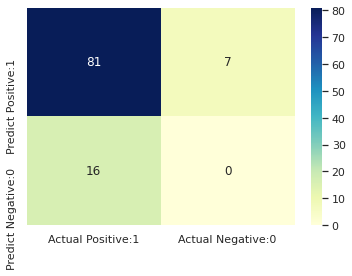

In [241]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [242]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.84      0.92      0.88        88
           Y       0.00      0.00      0.00        16

    accuracy                           0.78       104
   macro avg       0.42      0.46      0.44       104
weighted avg       0.71      0.78      0.74       104

